In [11]:
import pypianoroll
import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse import csc_matrix

In [ ]:
# File path for a sample track
npz_path = "piano_roll_drive/1a0d1c9557a0a3d3336e23779dd1fd8c.mid/0.npz"
json_path = "piano_roll_drive/1a0d1c9557a0a3d3336e23779dd1fd8c.mid/0"

# Load npz data and info.json
npz_data = np.load(npz_path)
info_json = np.load(json_path)

print(list(npz_data.keys()))
print(list(info_json.keys()))

['pianoroll_0_csc_data', 'pianoroll_0_csc_indices', 'pianoroll_0_csc_indptr', 'pianoroll_0_csc_shape']
['info.json']


The npz file contains the components of a CSC (Compressed Sparse Column) matrix, which are the non-zero values of the track.
- pianoroll_[index]_csc_data contains the data for active notes at specific time steps and pitches
- pianoroll_[index]_csc_indices contains the row indices for each active note
- pianoroll_[index]_csc_indptr contains the index pointers to help access the columns of the matrix

The shape of the pianoroll given by pianoroll_[index]_csc_shape represents (number of time steps, number of pitches).

The separate file contains info.json which has metadata and other track information.

In [14]:
# See what information the arrays contain
data = npz_data['pianoroll_0_csc_data']
indices = npz_data['pianoroll_0_csc_indices']
indptr = npz_data['pianoroll_0_csc_indptr']
shape = npz_data['pianoroll_0_csc_shape']
info = info_json['info.json']

print(data)
print(indices)
print(indptr)
print(shape)
print(info)

[97 97 97 ... 95 95 95]
[1727 1728 1729 ... 8151 8152 8153]
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
   342  2123  2123  2293  2293  3315  3849  3849  7388  7388  7424  7424
  8210 10167 10167 10362 10362 10413 10984 10984 10984 10984 10984 10984
 10984 10984 10984 10984 10984 10984 10984 10984 10984 10984 10984 10984
 10984 10984 10984 10984 10984 10984 10984 10984 10984 10984 10984 10984
 10984 10984 10984 10984 10984 10984 10984 10984 10984 10984 10984 10984
 10984 10984 10984 10984 10984 10984 10984 10984 10984]
[8450  128]
b'{"resolution": 24, "name": null, "0": {"program": 25, "is_drum": false, "name": "STEEL GTR"}}'


Since the value of pianoroll_[index]_csc_data is not just 1 or 0, the pianoroll also keeps track of velocity. Velocity ranges from 0 to 127.

In [ ]:
# Convert the numpy arrays back to a csc dense matrix
pianoroll_csc = csc_matrix((data, indices, indptr), shape=shape)
pianoroll_dense = pianoroll_csc.toarray()

After reconstructing the CSC matrix and converting it to a dense array, we can plot the track by visualizing the active note pitches at certain time steps. A higher note velocity is represented by a darker colour while a lower note velocity is represented by a lighter colour.

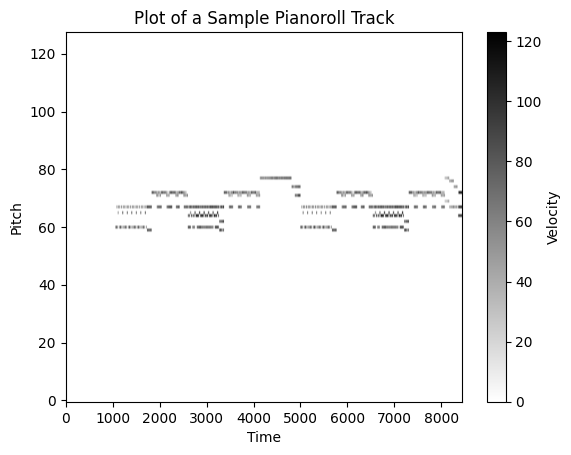

In [24]:
# Plot the track, transposing the matrix so time is x and pitch is y
plt.imshow(pianoroll_dense.T, aspect='auto', cmap='gray_r', origin='lower')
plt.colorbar(label='Velocity')
plt.xlabel('Time')
plt.ylabel('Pitch')
plt.title('Plot of a Sample Pianoroll Track')
plt.show()